In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement

A retain company ABC Private Ltd Ecommerce Company wants to understand customer purchase behavior specifically purchase amount against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The dataset also contains customer demographics(age, gender, marital status, city_hype. stay_in_current_city) product details(product_id and Product_category) and Total_purchase_amount from last month.

Now they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offers against customers from different prodcuts.

In [123]:
df_train = pd.read_csv('Black Friday Train.csv')
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [124]:
df_test = pd.read_csv('Black Friday Test.csv')
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [125]:
# append train and test data
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [127]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [128]:
df.drop(['User_ID'], axis = 1, inplace = True)

In [129]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [33]:
#pd.get_dummies(df['Gender'], drop_first = 1)

""
0
1
2
3
4
...
233594
233595
233596
233597


In [130]:
# handling categorical feature Gender
# converting Female to 0 amd Male to 1 converting string value to numerical value
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [131]:
# Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [132]:
#pd.get_dummies(df['Age'],drop_first = True)
# Target Ordinal Encoding and can also use to do it with label encoding
df['Age'] = df['Age'].map({'0-17': 1,'18-25' : 2,'26-35' : 3,'36-45' : 4,'46-50' : 5, '55+' :6}) 
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6.0,16,C,4+,0,8,NaN,NaN,7969.0


In [133]:
df_city = pd.get_dummies(df['City_Category'], drop_first = True)

In [134]:
df=pd.concat([df, df_city],axis =1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6.0,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [135]:
df.drop('City_Category', axis =1, inplace = True)

In [136]:
#Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                            54784
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [137]:
#focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [138]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [139]:
# replace missing values with Mode as features are categorical and discrete
# dont use mean it will create a new variable
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [140]:
df['Product_Category_2'].isnull().sum()

0

In [141]:
#Product category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [142]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [143]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [144]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [146]:
#convert object into integres
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [147]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6.0,16,4,0,8,8.0,16.0,7969.0,0,1


In [148]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         728883 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 77.7+ MB


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

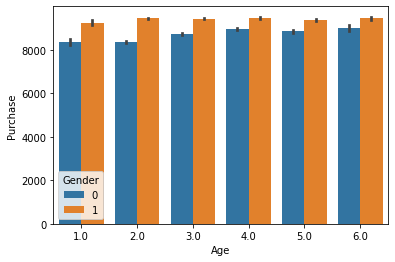

In [151]:
# visualization
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df)

## Purchase of Men is higher than women

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

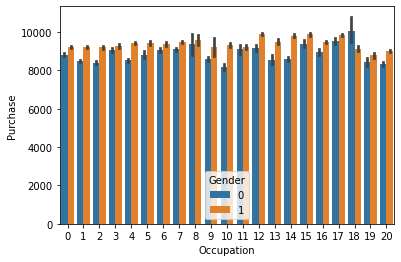

In [152]:
#visualization of Purchase by Occupation
sns.barplot('Occupation', 'Purchase', hue = 'Gender', data = df)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

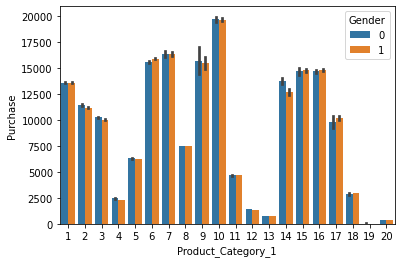

In [153]:
sns.barplot('Product_Category_1', 'Purchase', hue = 'Gender', data = df)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

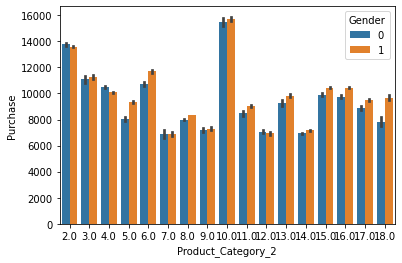

In [154]:
sns.barplot('Product_Category_2', 'Purchase', hue = 'Gender', data = df)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

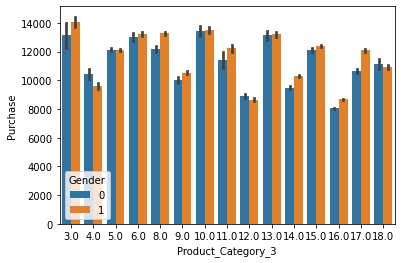

In [155]:
sns.barplot('Product_Category_3', 'Purchase', hue = 'Gender', data = df)

In [156]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6.0,16,4,0,8,8.0,16.0,7969.0,0,1


In [210]:
df_train = df_train.drop('Product_ID', axis = 1)
X = df_train.drop('Purchase', axis = 1)
X.head()
X.shape

(550068, 10)

In [211]:
y = df_train['Purchase']
y.shape

(550068,)

In [212]:
#Feature Scaling
df_test = df[df['Purchase'].isnull()] # since find values when purchase data is null
df_train = df[~df['Purchase'].isnull()] # if not null

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)                                                    

In [214]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)